<center><u><H1>Polynomial Regression</H1></u></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
%matplotlib inline

## Load data

In [2]:
boston = load_boston()# LSTAT: percent lower status of the population
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['MEDV'] = boston.target

## Preprocessing:

In [3]:
X = pd.DataFrame(np.c_[df_boston['LSTAT']], columns = ['LSTAT'])
y = df_boston['MEDV']

In [4]:
np.shape(df_boston['LSTAT'])

(506,)

In [5]:
np.shape(np.c_[df_boston['LSTAT']])

(506, 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2019)

## Creating polynomial models

In [7]:
lr = LinearRegression()
lr1 = LinearRegression()
lr2 = LinearRegression()

### Linear model

In [8]:
lr = lr.fit(X_train, y_train)

In [9]:
lr_pred = lr.predict(X_test)

linear_r2 = r2_score(y_test, lr_pred)
linear_r2

### Quadratic model

In [11]:
quadratic = PolynomialFeatures(degree=2)

In [12]:
X_quad = quadratic.fit_transform(X_train)

In [13]:
pr_quad = lr1.fit(X_quad, y_train)

In [14]:
pr_quad_pred = pr_quad.predict(quadratic.fit_transform(X_test))

quadratic_r2 = r2_score(y_test, pr_quad_pred)
quadratic_r2

### Cubic model

In [16]:
cubic = PolynomialFeatures(degree=3)

In [17]:
X_cubic = cubic.fit_transform(X_train)

In [18]:
pr_cubic = lr2.fit(X_cubic, y_train)

In [19]:
pr_cubic_pred = pr_cubic.predict(cubic.fit_transform(X_test))

cubic_r2 = r2_score(y_test, pr_cubic_pred)
cubic_r2

## Plotting models:

In [21]:
X_plot = np.linspace(2, 40, 50).reshape(-1, 1)
lr_pred1 = lr.predict(X_plot)
pr_quad_pred1 = pr_quad.predict(quadratic.fit_transform(X_plot))
pr_cubic_pred1 = pr_cubic.predict(cubic.fit_transform(X_plot))

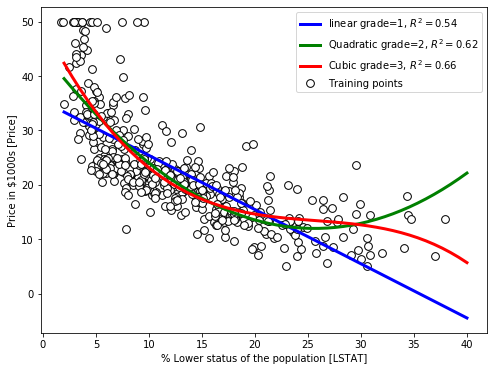

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, label='Training points', color='white', edgecolor='black', s=60)
plt.plot(X_plot, lr_pred1, label='linear grade=1, $R^2=%.2f$' % linear_r2, color='blue', lw=3, linestyle='-')
plt.plot(X_plot, pr_quad_pred1, label='Quadratic grade=2, $R^2=%.2f$' % quadratic_r2,
        color='green', lw=3, linestyle='-')
plt.plot(X_plot, pr_cubic_pred1, label='Cubic grade=3, $R^2=%.2f$' % cubic_r2,
        color='red', lw=3, linestyle='-')

plt.xlabel('% Lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [Price]')
plt.legend(loc='best',fancybox=True)

## Reference:

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html